# Random Forest Model For Regression And Classification

In [5]:
# Imports backages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

# Random Forest Model For U.S. Pollution dataset (Regression)

In [6]:
# Load the dataset
pollution = pd.read_csv('C:\\Users\\-\\Downloads\\pollution_us_2000_2016.csv')
# show the top 5 rows
pollution.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


# EDA

In [7]:
# info about the dataset
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [8]:
# Finding the null values
pollution.isnull().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [9]:
# Filling missing values using forward and backward fill
pollution = pollution.fillna(method='ffill').fillna(method='bfill')

# Check 
pollution.isnull().sum()

Unnamed: 0           0
State Code           0
County Code          0
Site Num             0
Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Units            0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Units             0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

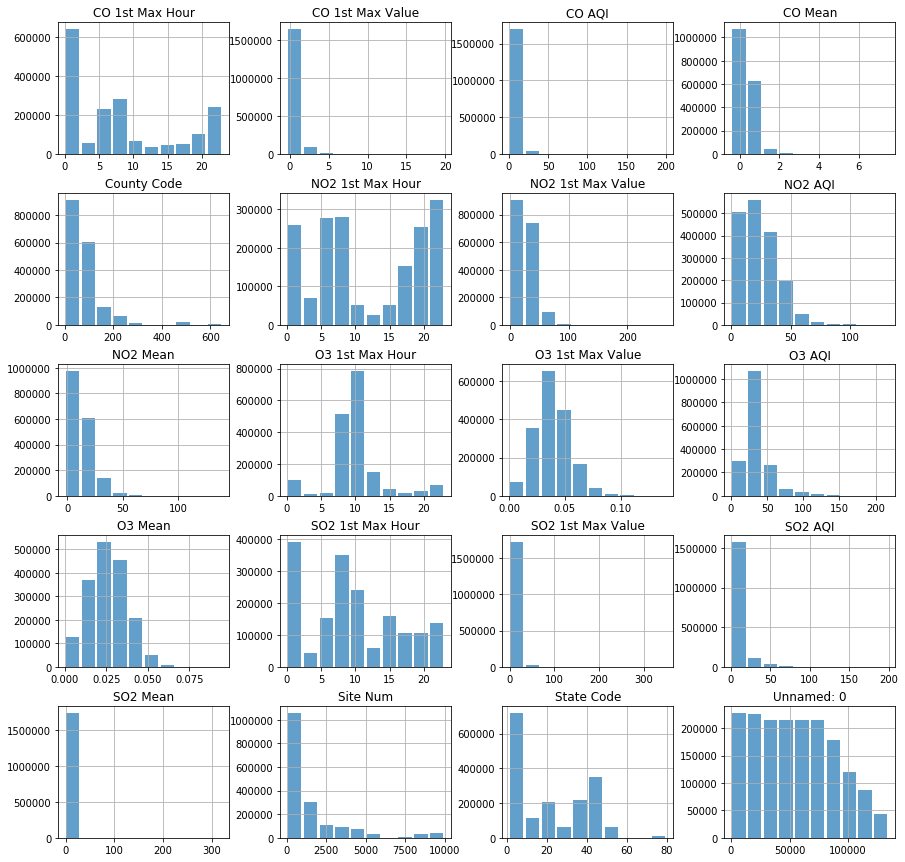

In [10]:
pollution.hist(figsize = (15, 15),alpha=0.7, rwidth=0.85);

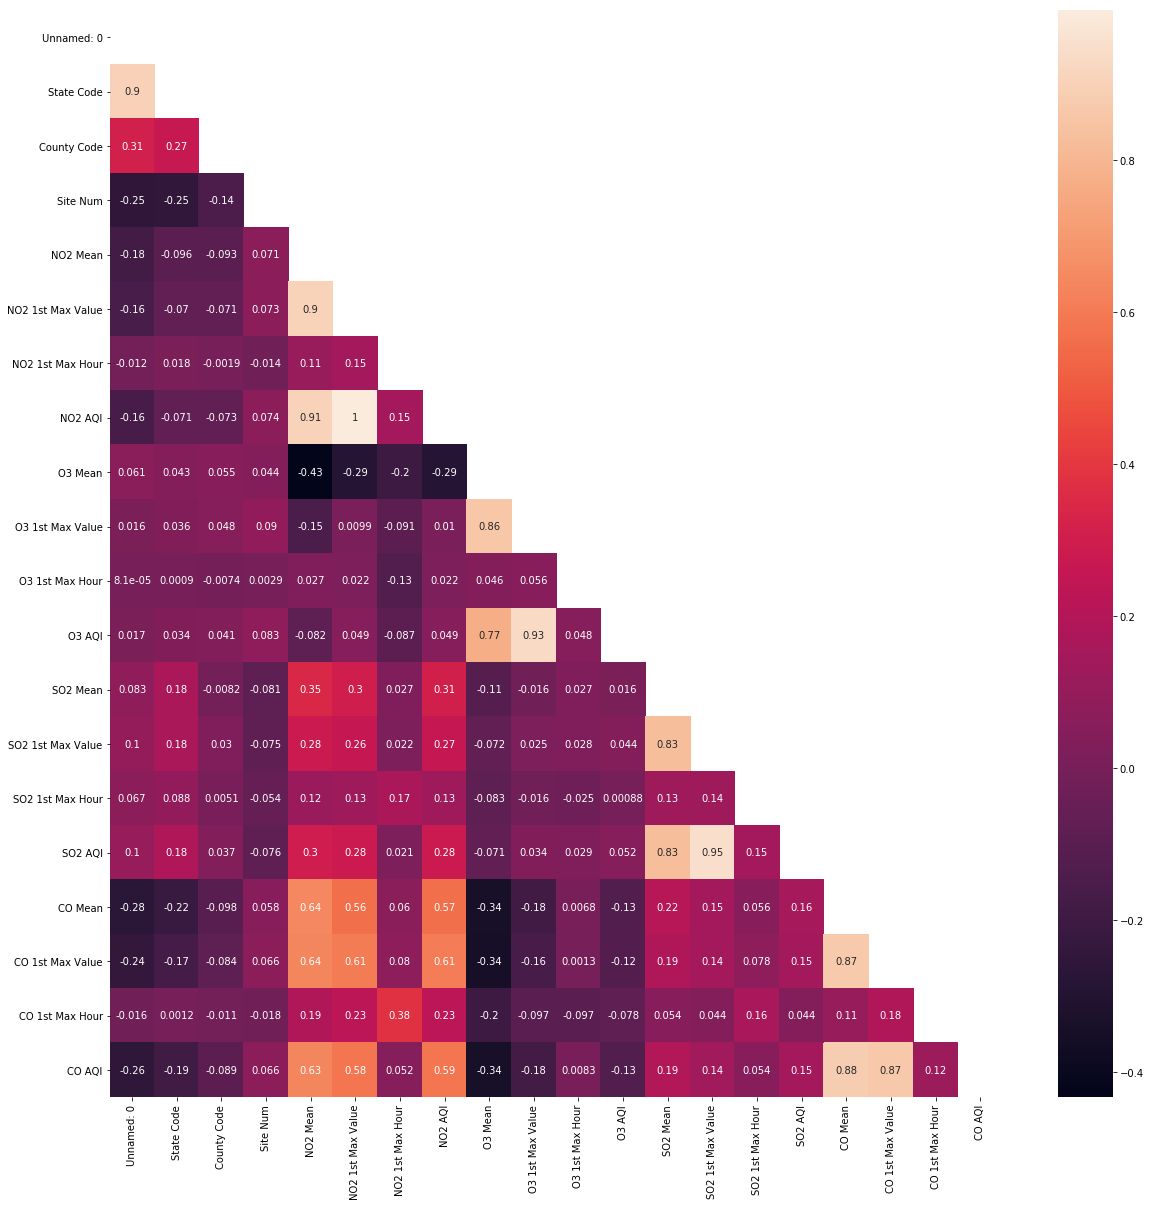

In [11]:
# heat-map for all variables in the dataset to find the relationship between the variables
plt.figure(figsize=(20,20))
sns.heatmap(pollution.corr(), annot=True, mask=np.triu(pollution.corr()))

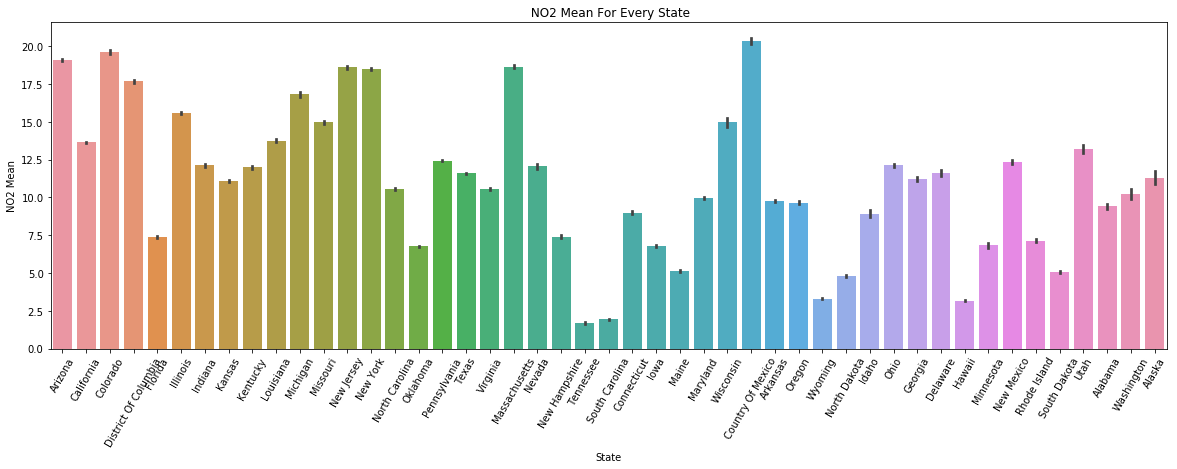

In [12]:
plt.figure(figsize = (20, 6))
sns.barplot(x = 'State', y = 'NO2 Mean', data = pollution)
plt.xticks(rotation = 60)
plt.title(" NO2 Mean For Every State");

## Decision Tree For Regression

In [13]:
# split dataset in features and target variable
feature_cols = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 AQI','O3 Mean','O3 1st Max Value','O3 AQI','SO2 Mean',
                'SO2 1st Max Value', 'SO2 AQI', 'CO Mean', 'CO 1st Max Value']
X = pollution[feature_cols] # Features
y = pollution['CO AQI'] # Target variable
 
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
reg_tree = DecisionTreeRegressor(random_state = 0, max_depth= 4, criterion= 'mse')
reg_tree.fit(X_train, y_train)

preds_tree = reg_tree.predict(X_test)

mean_absolute_error(y_true=y_test, y_pred=preds_tree)

1.2695796908339887

In [8]:
reg_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.23997732,
       0.76002268])

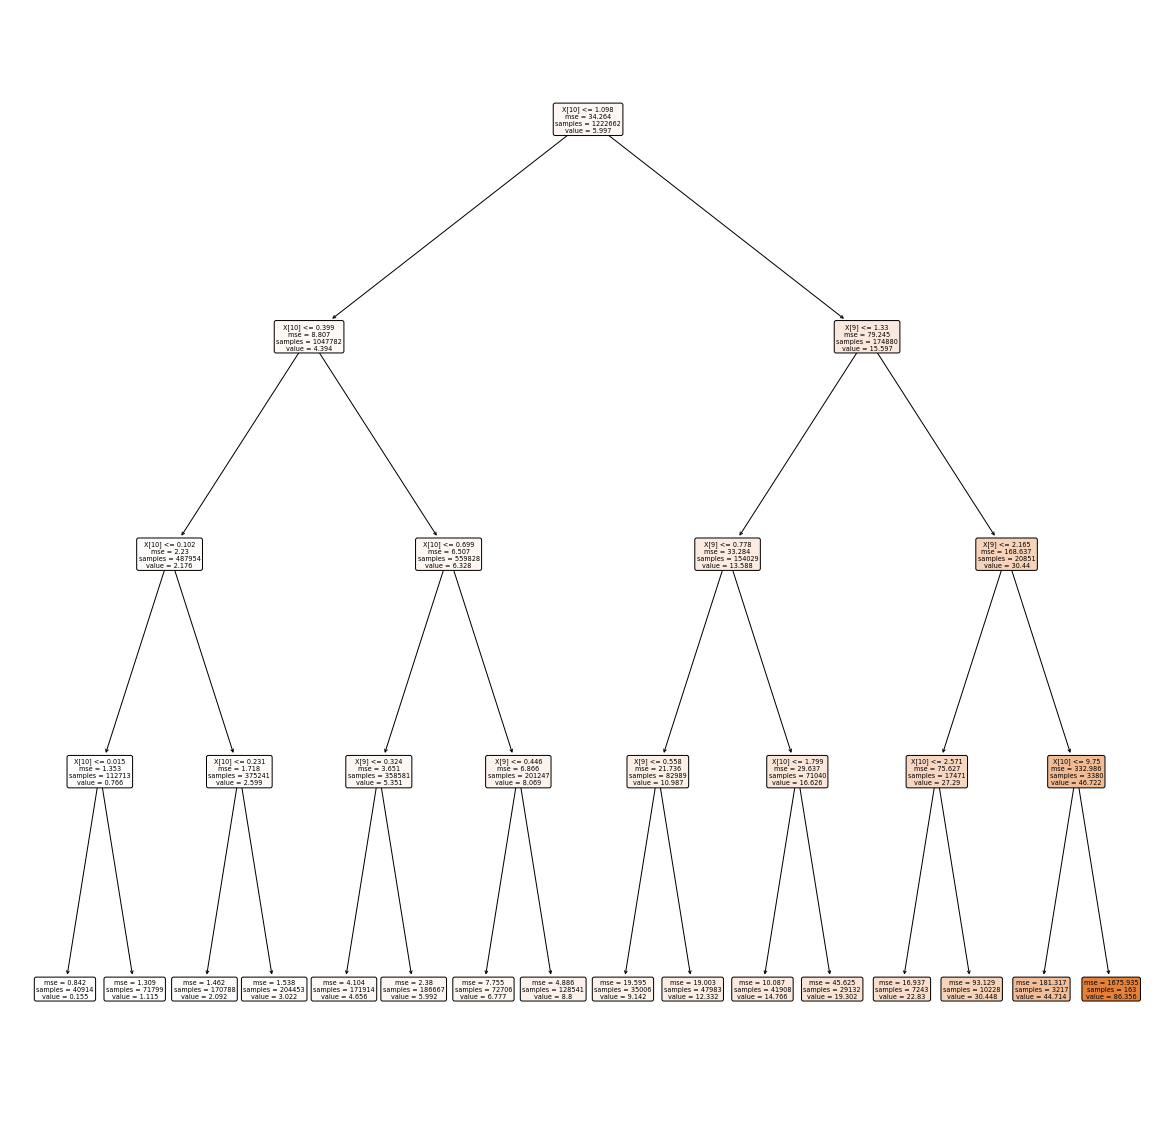

In [9]:
# Plot the decision tree
plt.figure(figsize=(20,20))

tree.plot_tree(
    reg_tree, 
    filled=True,
    rounded=True,
    
);

## Linear Regression

In [15]:
# Create a logistic regression model to compare with the decision tree model

reg_log = LinearRegression()
reg_log.fit(X_train, y_train)

preds_log = reg_log.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=preds_log)

1.2430422649575519

## Random Forest Model For Regression

In [16]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')
reg_forest.fit(X_train, y_train)

preds_forest = reg_forest.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=preds_forest)

1.0128042719840755

In [12]:
reg_forest.feature_importances_

array([0.02322918, 0.01091527, 0.00751645, 0.02088264, 0.00972482,
       0.00889645, 0.02653762, 0.01692958, 0.00791249, 0.23167598,
       0.63577951])

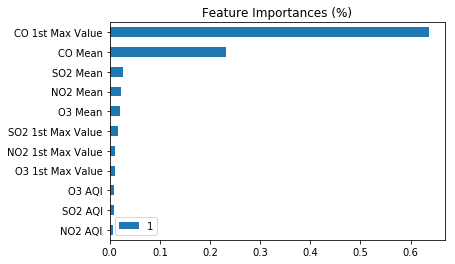

In [13]:
# Plot Feature Importances to Visualize better

pd.DataFrame(dict(zip(X_train.columns, reg_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

# Random Forest Model For Bank dataset (Classification)

In [9]:
# Load the dataset
bank = pd.read_csv('https://raw.githubusercontent.com/Yasmeenmad/data_science_bootcamp/main/Week12/Random_Forest/bank.csv', sep=';')
# show the top 5 rows
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# EDA

In [10]:
# dataset info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
# Finding the null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
# describe all the numerical columns
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [14]:
# describe all the categorical columns
bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


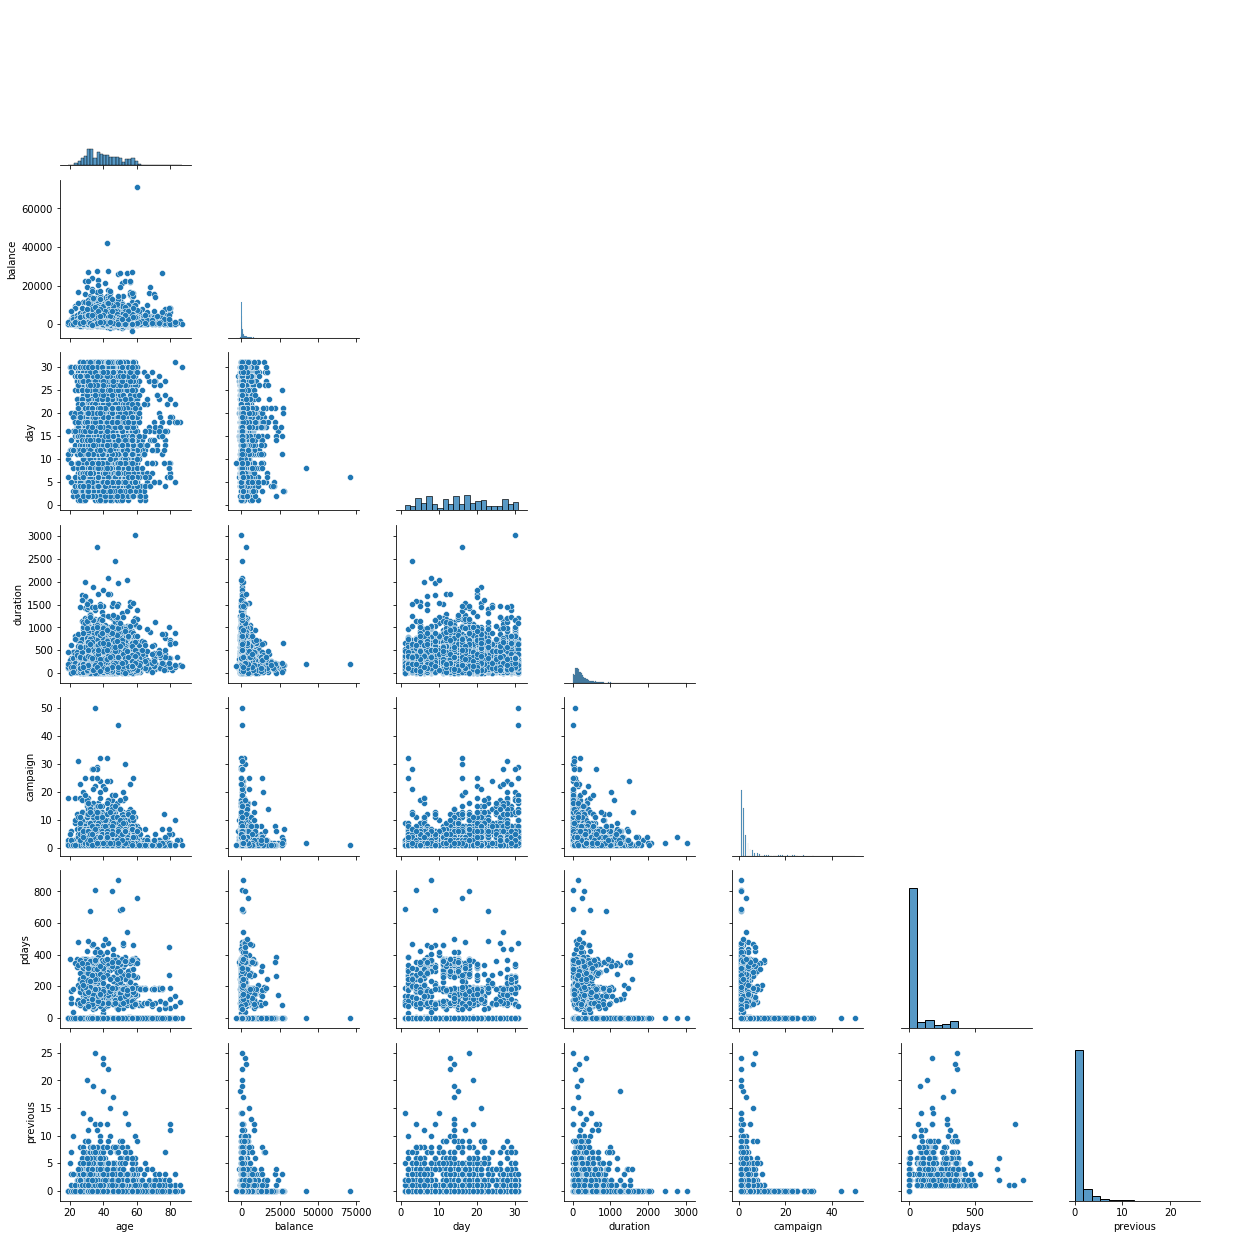

In [41]:
# scatter plot all the variables in the dataset
sns.pairplot(bank, corner=True);

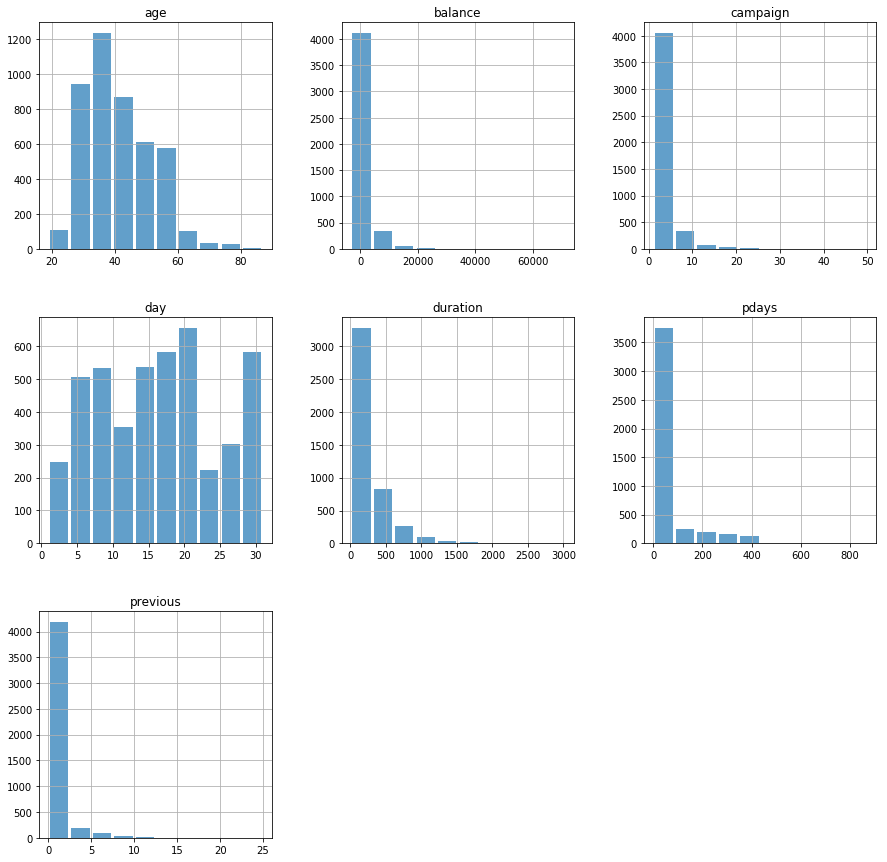

In [42]:
bank.hist(figsize = (15, 15),alpha=0.7, rwidth=0.85);

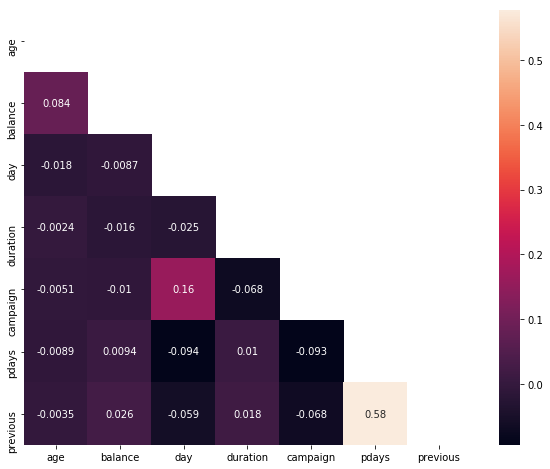

In [43]:
# heat-map for all variables in the dataset to find the relationship between the variables
plt.figure(figsize=(10,8))
sns.heatmap(bank.corr(), annot=True, mask=np.triu(bank.corr()))

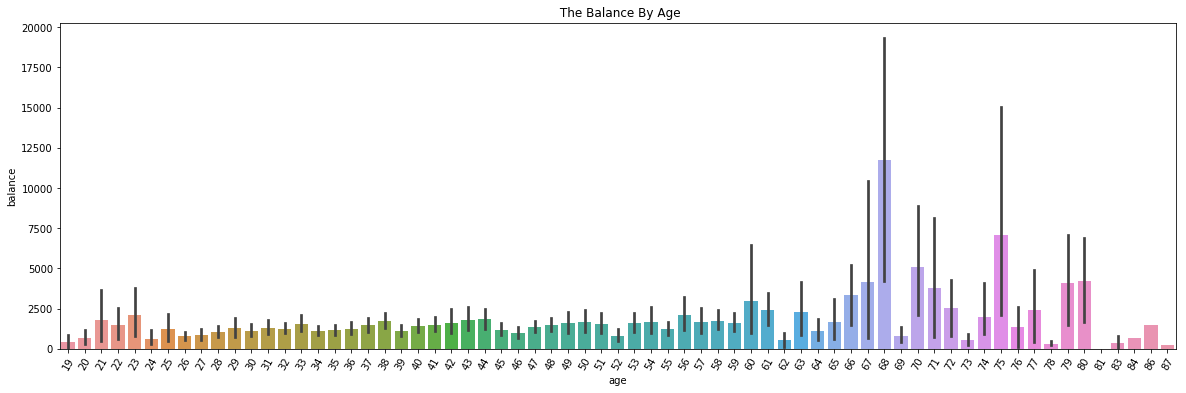

In [17]:
plt.figure(figsize = (20, 6))
sns.barplot(x = 'age', y = 'balance', data = bank)
plt.xticks(rotation = 60)
plt.title(" The Balance By Age");

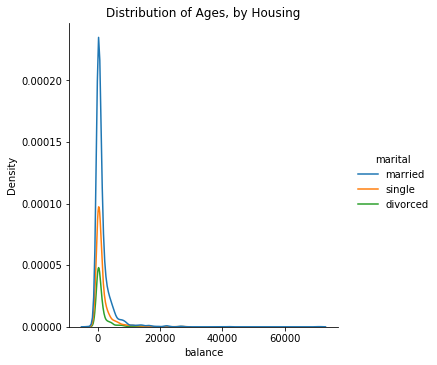

In [18]:
sns.displot(bank, x="balance", hue="marital", kind="kde")
plt.title("Distribution of Balance, by Marital");

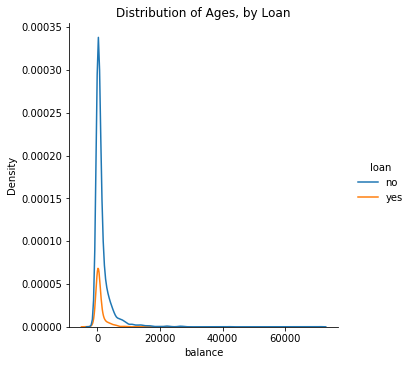

In [16]:
sns.displot(bank, x="age", hue="loan", kind="kde")
plt.title("Distribution of Ages, by Loan");

## Decision Tree For Regression

In [19]:
# split dataset in features and target variable

X = bank.iloc[:, 0:-1] # Features
y = bank['y'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [20]:
# Function to convert object culomns to Numeric 
def cleaner(df):
    
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

X_train = cleaner(X_train)
X_test = cleaner(X_test)

In [21]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#### Decision Tree Classfication Model Using Entropy Information Gainx

In [22]:
class_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=4)

In [23]:
class_tree.fit(X_train_sc, y_train)

preds_class = class_tree.predict(X_test_sc)

In [24]:
val_train = round(class_tree.score(X_train_sc, y_train),2)*100
val_test = round(class_tree.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 90.0%
Test Set Accuracy: 87.0%


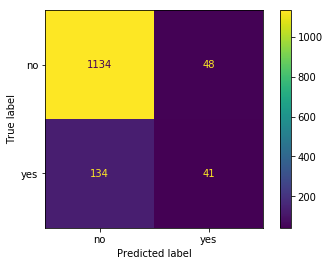

In [25]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_tree, X_test_sc, y_test);

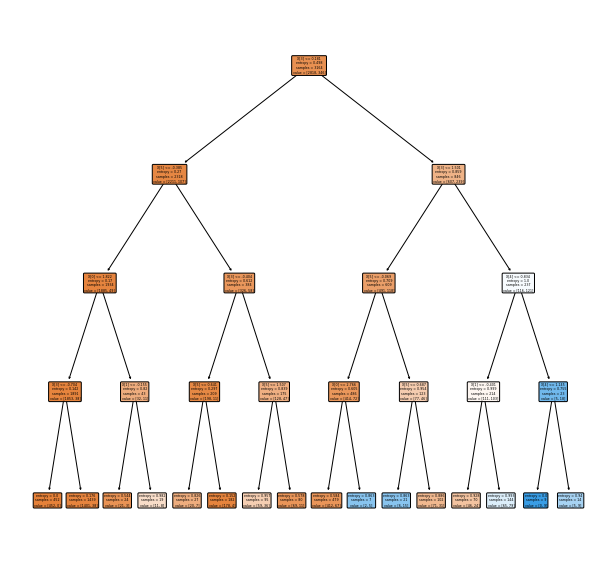

In [26]:
# Plot the decision tree
plt.figure(figsize=(10,10))

tree.plot_tree(
    class_tree, 
    filled=True,
    rounded=True,
);

#### Decision Tree Classfication Model Using Gini Index

In [27]:
class_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [28]:
class_tree.fit(X_train_sc, y_train)
preds_class = class_tree.predict(X_test_sc)

In [29]:
val_train = round(class_tree.score(X_train_sc, y_train),2)*100
val_test = round(class_tree.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 91.0%
Test Set Accuracy: 87.0%


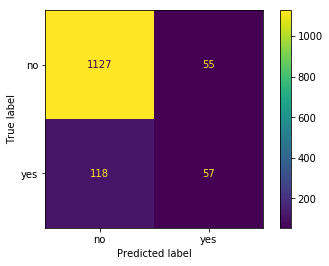

In [30]:
# We can also make a simple confusion matrix

plot_confusion_matrix(class_tree, X_test_sc, y_test);

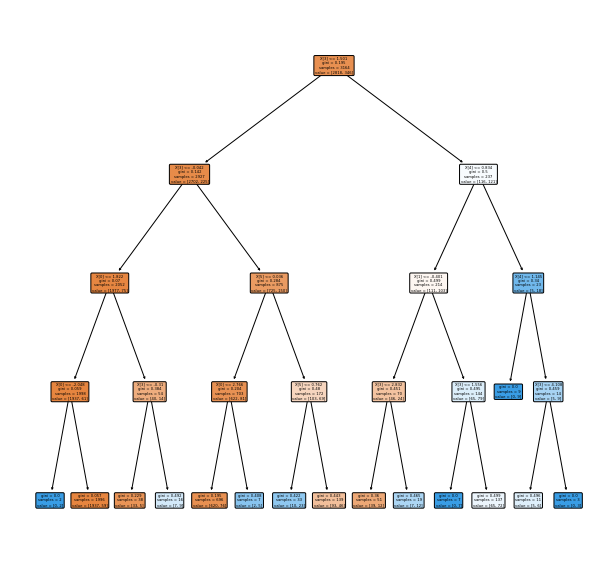

In [31]:
# Plot the decision tree
plt.figure(figsize=(10,10))

tree.plot_tree(
    class_tree, 
    filled=True,
    rounded=True,
);

## Random Forest For Classification

In [32]:
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
class_forest.fit(X_train_sc, y_train)
preds_class = class_forest.predict(X_test_sc)

In [33]:
val_train = round(class_forest.score(X_train_sc, y_train),2)*100
val_test = round(class_forest.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 99.0%
Test Set Accuracy: 87.0%


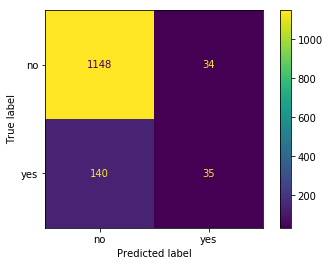

In [34]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_forest, X_test_sc, y_test);

In [35]:
print(classification_report(y_train, class_forest.predict(X_train)))

              precision    recall  f1-score   support

          no       0.91      0.70      0.79      2818
         yes       0.15      0.44      0.23       346

    accuracy                           0.67      3164
   macro avg       0.53      0.57      0.51      3164
weighted avg       0.83      0.67      0.73      3164



## Baseline

In [36]:
# baseline (majority class)
y_train.value_counts(normalize=True)

no     0.890645
yes    0.109355
Name: y, dtype: float64

In [37]:
# baseline (majority class)
y_test.value_counts(normalize=True)

no     0.871039
yes    0.128961
Name: y, dtype: float64

**Random Forest** performs better than Baseline

## Random Forest using Grid Seach

In [38]:
# Classification

param_grid = {
    "n_estimators": [10,20,30], # how many trees in our forest
    "criterion": ["gini", "entropy"], # what criteria is used to split nodes
    "max_depth": [2,4,6] # how deep each decision tree can be
    
}

grid = GridSearchCV(
    class_forest,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

grid_df = pd.DataFrame(grid.cv_results_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


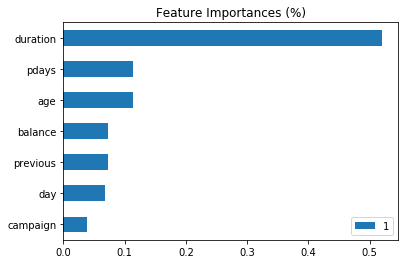

In [39]:
# Plot Feature Importances to Visualize better

pd.DataFrame(dict(zip(X_train.columns, grid.best_estimator_.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

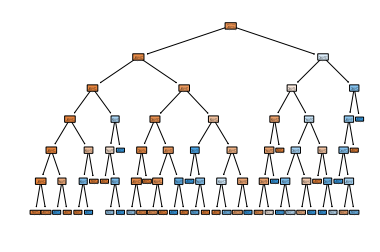

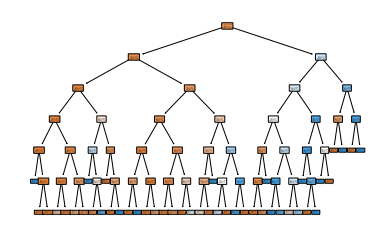

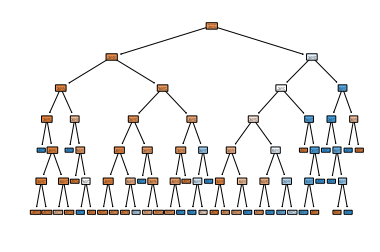

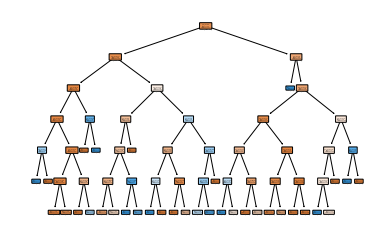

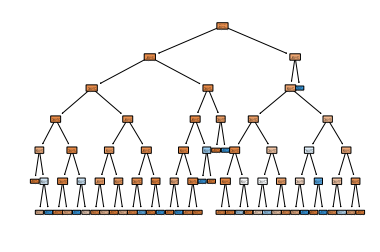

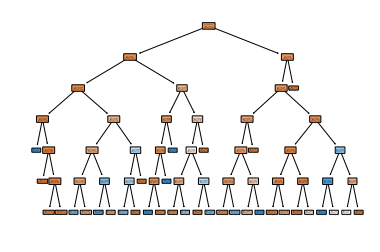

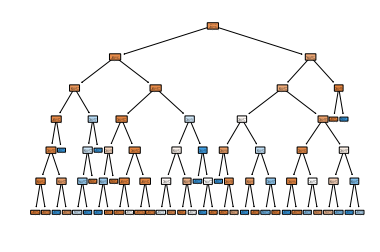

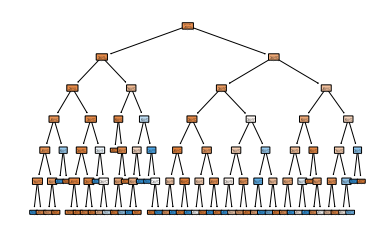

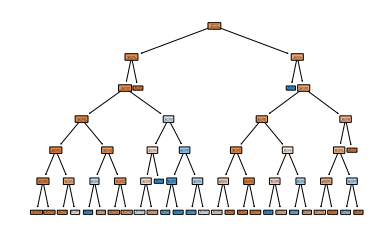

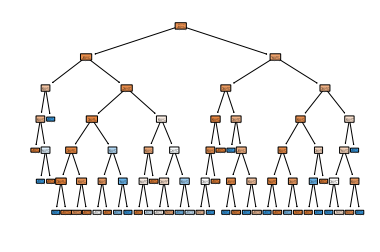

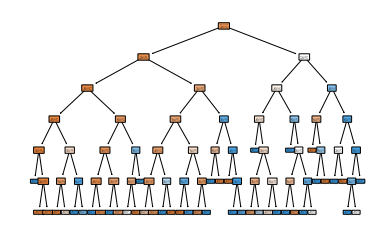

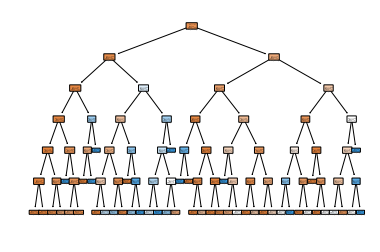

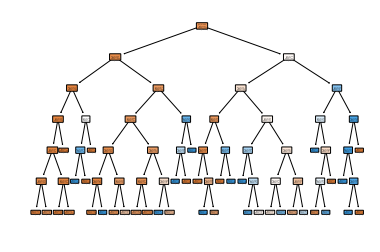

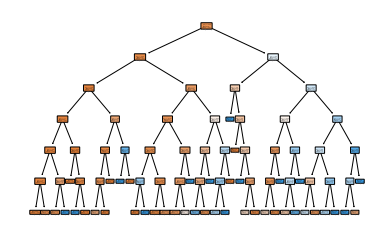

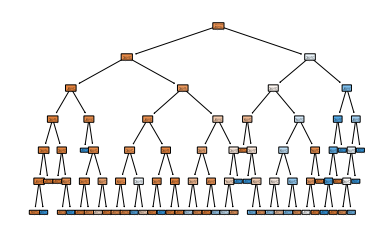

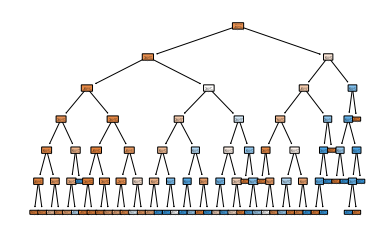

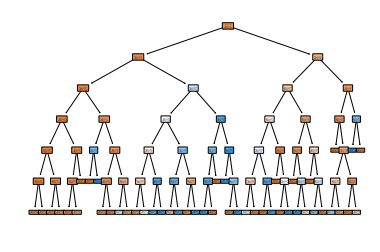

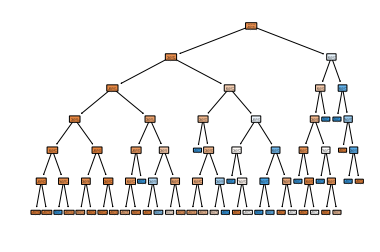

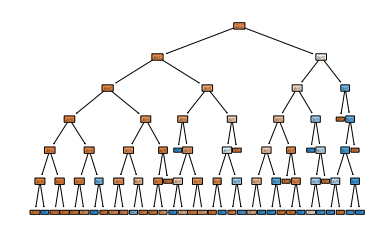

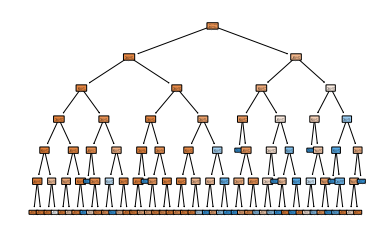

In [40]:
# Plot the Decision Trees from the Grid Search Random Forest
for x in range(len(grid.best_estimator_.estimators_)):
    tree.plot_tree(
    grid.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()